# DatafestAfrica ML Hackathon Exploration

## Introduction
> This exploration is done on the train and test data provided for the competition. There are 21 features and 20 features in train and test respectively.

In [47]:
#import all packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [4]:
#loading data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
#top 5 rows
train.head()

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0
2,8492423,21,weekly,0,2303,0,5,8,2,7,...,600,74850,0.677109,0.758765,0.495609,0.664762,0.592556,0.492556,6,1
3,7948313,26,bi-weekly,0,2795,0,4,4,1,6,...,800,50800,0.738055,0.873204,0.666437,0.700392,0.584130,0.684130,14,1
4,4297036,43,bi-weekly,0,5000,0,2,1,1,2,...,1100,69100,0.798303,0.841747,0.401971,0.568787,0.525905,0.725905,5,1


In [16]:
print(train.shape)
print(test.shape)

(12516, 21)
(5392, 20)


In [14]:
train.columns

Index(['Entry_id', 'age', 'pay_schedule', 'home_owner', 'income',
       'months_employed', 'years_employed', 'current_address_year',
       'personal_account_m', 'personal_account_y', 'has_debt',
       'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month', 'e_signed'],
      dtype='object')

In [17]:
test.columns

Index(['Entry_id', 'age', 'pay_schedule', 'home_owner', 'income',
       'months_employed', 'years_employed', 'current_address_year',
       'personal_account_m', 'personal_account_y', 'has_debt',
       'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month'],
      dtype='object')

The train contain 12516 records, 21 columns while the test contain 5392 records and 20 columns. The difference of the train and test in features is the target column `e_signed`.

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12516 entries, 0 to 12515
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entry_id              12516 non-null  int64  
 1   age                   12516 non-null  int64  
 2   pay_schedule          12516 non-null  object 
 3   home_owner            12516 non-null  int64  
 4   income                12516 non-null  int64  
 5   months_employed       12516 non-null  int64  
 6   years_employed        12516 non-null  int64  
 7   current_address_year  12516 non-null  int64  
 8   personal_account_m    12516 non-null  int64  
 9   personal_account_y    12516 non-null  int64  
 10  has_debt              12516 non-null  int64  
 11  amount_requested      12516 non-null  int64  
 12  risk_score            12516 non-null  int64  
 13  risk_score_2          12516 non-null  float64
 14  risk_score_3          12516 non-null  float64
 15  risk_score_4       

In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5392 entries, 0 to 5391
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entry_id              5392 non-null   int64  
 1   age                   5392 non-null   int64  
 2   pay_schedule          5392 non-null   object 
 3   home_owner            5392 non-null   int64  
 4   income                5392 non-null   int64  
 5   months_employed       5392 non-null   int64  
 6   years_employed        5392 non-null   int64  
 7   current_address_year  5392 non-null   int64  
 8   personal_account_m    5392 non-null   int64  
 9   personal_account_y    5392 non-null   int64  
 10  has_debt              5392 non-null   int64  
 11  amount_requested      5392 non-null   int64  
 12  risk_score            5392 non-null   int64  
 13  risk_score_2          5392 non-null   float64
 14  risk_score_3          5392 non-null   float64
 15  risk_score_4         

The train and test is made up of float, int and object dtypes. Some of the features have been preprocessed to numerical e.g `home_owner`, `months_employed`, `years_employed` which could have been categorical.

The dataset(train and test) contain no missing values.

In [43]:
print(train.duplicated().sum())
print(test.duplicated().sum())

0
0


Both the train and test contain no duplicate.

### Age

In [24]:
#distribution plot for the age

In [74]:
#a function to plot histogram
def histogram(name):
    fig, ax = plt.subplots(ncols=2, figsize = [10,5])
    ax[0].hist(train[name])
    ax[1].hist(test[name])
    plt.xlabel(name)
    ax[0].title.set_text(name+'_Train')
    ax[1].title.set_text(name+'_Test');

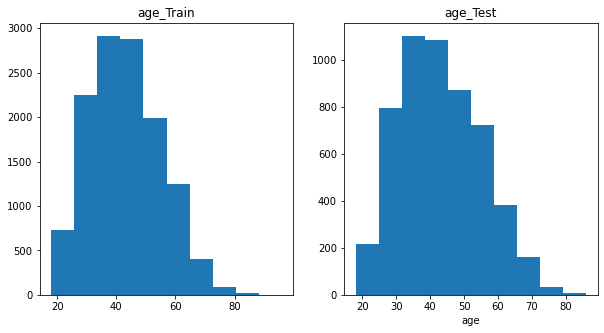

In [77]:
histogram('age')

The distribution of the age follows a normal distribution. and 90% of the age of the record is between 30 - 60 years. And the distribution plotted shows no outliers.

### Pay_schedule

In [70]:
#a function to plot count of categories
def countplot(name):
    
    #to set order of categories
    train_order = train[name].value_counts().keys()
    test_order = test[name].value_counts().keys()
    
    fig, ax = plt.subplots(ncols=2, figsize = [10,5])
    sns.countplot(train[name], ax=ax[0], color='blue', order=train_order)
    sns.countplot(test[name], ax=ax[1], color='blue', order=test_order)
    
    ax[0].title.set_text(name+'_Train')
    ax[1].title.set_text(name+'_Test');

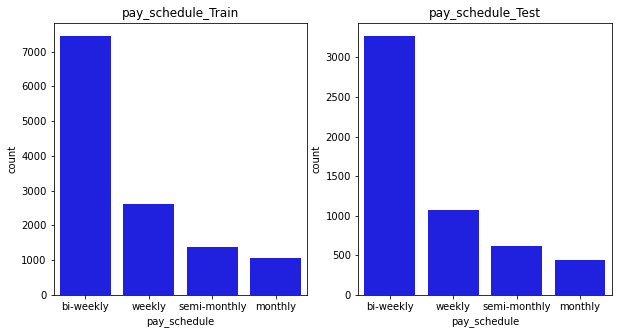

In [71]:
countplot('pay_schedule')

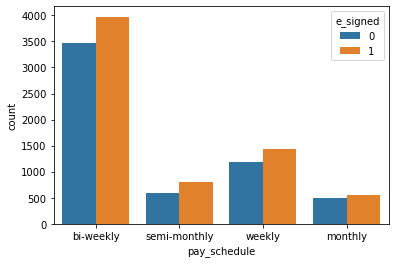

In [117]:
sns.countplot(train.pay_schedule, hue=train.e_signed);

In both cases of our data, the bi-weekly pay schedule is the most preferred way of payment followed by weeky and lastly monthly. The chart also shows that there are 4 categories of pay schedule; Weekly, Bi-weekly, Semi-monthly and Monthly.

The payment method using ratio of each categories has no much impact on the approval.

### Home Owner

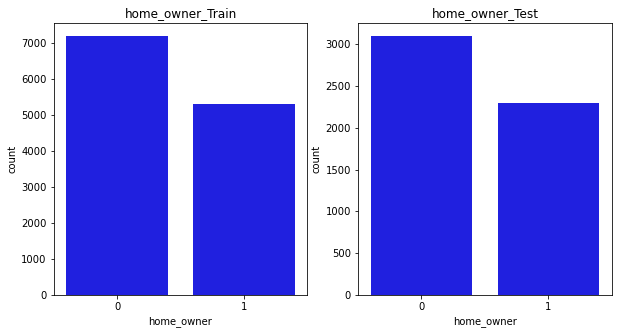

In [72]:
countplot('home_owner')

In [73]:
train.home_owner.value_counts(normalize=True)

0    0.574944
1    0.425056
Name: home_owner, dtype: float64

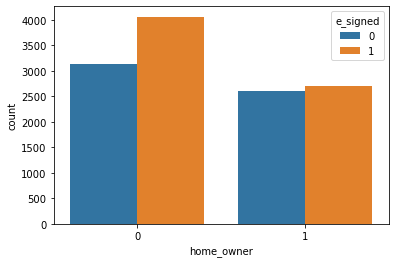

In [118]:
sns.countplot(train.home_owner, hue=train.e_signed);

Assuming having a home is 1 and not is 0, it shows that in the dataset does without homes are a little bit more than those who have. 

Almost all home owner gets equal chance of getting approved or rejected. 

### Income

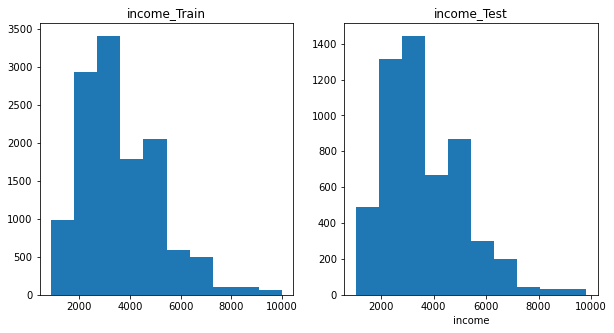

In [75]:
histogram('income')

The income distribution is right skewed, it also show as spike of customer earning within 2000 to 3000 borrowing more. 
A log transformation of this may improve modelo performance and further analysis.

### Month Employed

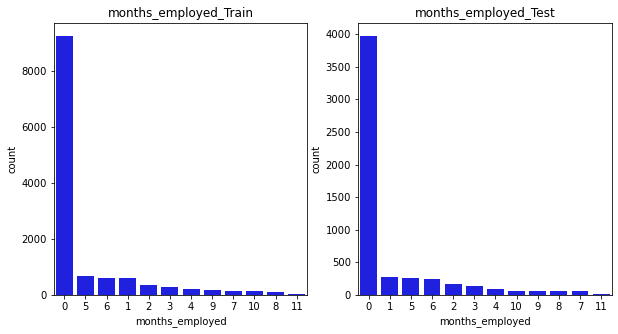

In [78]:
countplot('months_employed')

Something seems not right, the data shows a behaviour of customer having more to borrow in the 0 month which can be December or January. This period is a festive period
To boost model performance this feature can be dummified or used in feature generation.

### Year Employed

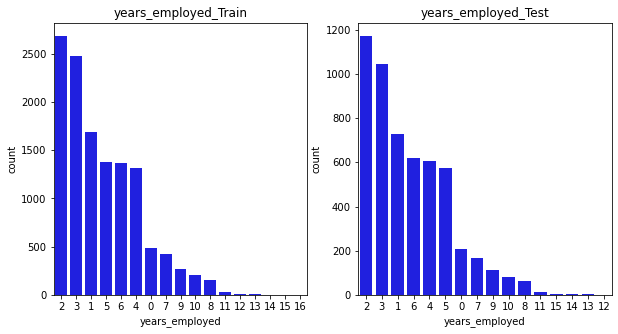

In [80]:
countplot('years_employed')

Majority of the those that borrow have less than 7 years of employment. and one-hot will be a bad idea for the feature, the train has data with higher year of employment than the test.

### Current Address Year

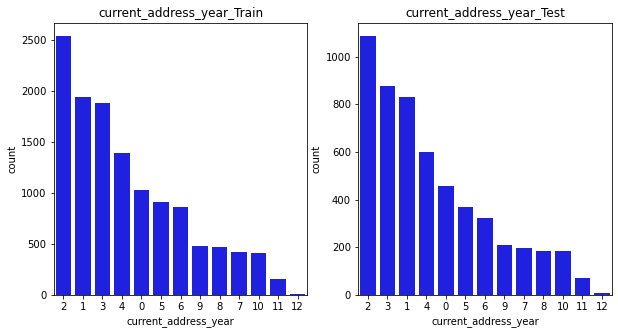

In [82]:
countplot('current_address_year')

### Has Debt

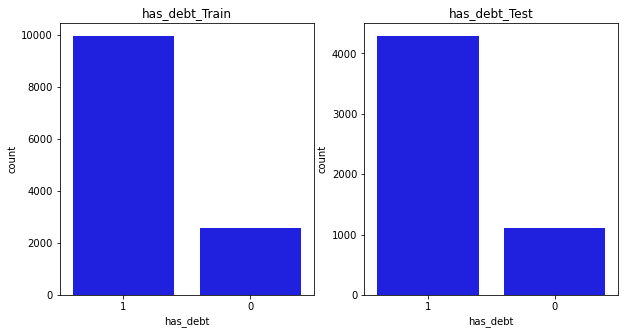

In [84]:
countplot('has_debt')

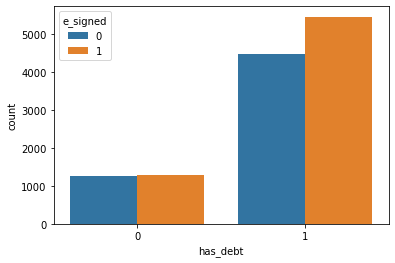

In [86]:
sns.countplot(train.has_debt, hue = train.e_signed);

This shows that majority has debt, if 1 represent Yes in the encoded data. And there is a strong correlation between the e-signed and the 0 has_debt.
Shows that having debt might be a good consideration in approving loan.

### Amount Request

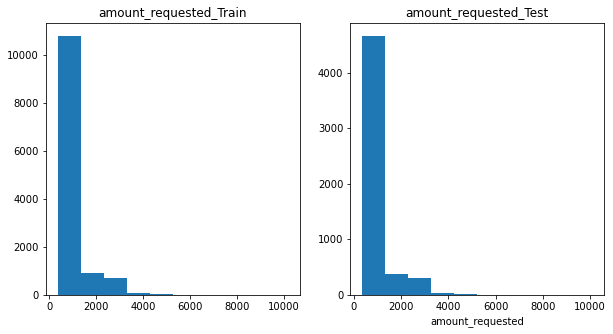

In [87]:
histogram('amount_requested')

<AxesSubplot:xlabel='amount_requested'>

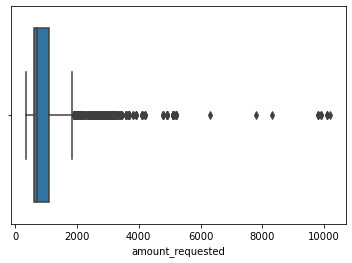

In [88]:
sns.boxplot(train.amount_requested)

The amount requested can be has high as 10000, which can be outlier, and it is left skewed. Log transformation can cause a change.

### Risk Score

In [95]:
train[['risk_score', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'risk_score_5']].head()

,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5
0,36200,0.737398,0.903517,0.487712,0.515977
1,53850,0.617361,0.857560,0.613487,0.665523
2,74850,0.677109,0.758765,0.495609,0.664762
3,50800,0.738055,0.873204,0.666437,0.700392
4,69100,0.798303,0.841747,0.401971,0.568787


The risk score value seems odd compared to others which could have been a mistake. It will be divided by 100000 to bring it to others level

In [99]:
train.risk_score = train.risk_score/100000
test.risk_score = test.risk_score/100000

Getting the average of the risk_scores might be a good one and for further exploration

In [113]:
train['risk_average'] = (train.risk_score + train.risk_score_2 + train.risk_score_3 + train.risk_score_4 + train.risk_score_5)/5

test['risk_average'] = (test.risk_score + test.risk_score_2 + test.risk_score_3 + test.risk_score_4 + test.risk_score_5)/5

### Checking the average risk score of the loan approved compared to the others

In [114]:
train.head()

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,risk_average
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,0.3620,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,0.601321
1,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,0.5385,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,0.658486
2,8492423,21,weekly,0,2303,0,5,8,2,7,...,0.7485,0.677109,0.758765,0.495609,0.664762,0.592556,0.492556,6,1,0.668949
3,7948313,26,bi-weekly,0,2795,0,4,4,1,6,...,0.5080,0.738055,0.873204,0.666437,0.700392,0.584130,0.684130,14,1,0.697218
4,4297036,43,bi-weekly,0,5000,0,2,1,1,2,...,0.6910,0.798303,0.841747,0.401971,0.568787,0.525905,0.725905,5,1,0.660362


In [115]:
train.groupby('e_signed').mean()['risk_average']

e_signed
0    0.693592
1    0.698511
Name: risk_average, dtype: float64

There is no significant different between the average of the risk of both groups.

### Ext Quality Score

Finding the mean of the ext_quality_score too...

In [119]:
train['ext_quality_average'] = (train['ext_quality_score'] + train['ext_quality_score_2'])/2

test['ext_quality_average'] = (test['ext_quality_score'] + test['ext_quality_score_2'])/2

In [120]:
train.groupby('e_signed').mean()['ext_quality_average']

e_signed
0    0.625758
1    0.618673
Name: ext_quality_average, dtype: float64

There is also no significant difference between the approved and rejected ext_quality average.

### Inquiries Last Month

In [121]:
train.inquiries_last_month.value_counts()

6     2065
5     1937
4     1683
3     1283
7     1230
8      918
2      880
9      610
10     489
11     352
12     234
13     186
14     132
15     105
16      81
17      58
18      52
19      49
20      31
21      31
22      23
24      16
23      14
26      14
27      12
25       9
28       9
1        6
29       4
30       3
Name: inquiries_last_month, dtype: int64

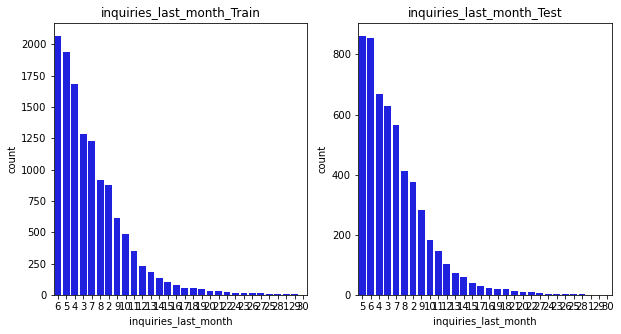

In [122]:
countplot('inquiries_last_month')

In [123]:
train.groupby('e_signed').mean()['inquiries_last_month']

e_signed
0    6.622609
1    6.384866
Name: inquiries_last_month, dtype: float64

 For both cases the average number on inquiries in the previous month is 6 to 7 times.